This script is meant to contain a bunch of timeseries diagrams that show how certain variables are changing over time. At the moment it is very messy due to some... experimentation with the best way to protry these time series given the disperse sampling time of the Wade and CTD data. Hopefully, we can acquire some moore data that will allow for the formation of more detailed timeseries. This notebook will allow for multiple years to e viewed easily. 

In [1]:
import sys
sys.path.append('/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools')
print(sys.path)

['/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Evaluations/Individual_Timeseries', '/home/kflanaga/miniconda3/envs/py39/lib/python39.zip', '/home/kflanaga/miniconda3/envs/py39/lib/python3.9', '/home/kflanaga/miniconda3/envs/py39/lib/python3.9/lib-dynload', '', '/home/kflanaga/.local/lib/python3.9/site-packages', '/ocean/kflanaga/MEOPAR/tools/SalishSeaTools', '/home/kflanaga/miniconda3/envs/py39/lib/python3.9/site-packages', '/home/kflanaga/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/extensions', '/home/kflanaga/.ipython', '/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import json
import f90nml
import xarray as xr
import datetime as dt
import Keegan_eval_tools as ket
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [3]:
year=2009
modelversion='nowcast-green.201905'
PATH= '/results2/SalishSea/nowcast-green.201905/'
datadir='/ocean/eolson/MEOPAR/obs/WADE/ptools_data/ecology'

In [4]:
display(Markdown('''## Year: '''+ str(year)))

## Year: 2009

In [5]:
display(Markdown('''### Model output: '''+ PATH))

### Model output: /results2/SalishSea/nowcast-green.201905/

In [6]:
##### Loading in pickle file data
saveloc='/ocean/kflanaga/MEOPAR/savedData'

with open(os.path.join(saveloc,f'data_WADE_{modelversion}_{year}.pkl'),'rb') as hh:
    data=pickle.load(hh)

In [32]:
def TsByRegion(regions,obsvar,modvar,year):
    for r in regions:
        fig,ax=plt.subplots(1,1,figsize=(18,8))
        ps=ket.tsertser_graph(ax,datreg[r],obsvar,modvar,dt.datetime(year,1,1),dt.datetime(year,12,31))
        ax.legend(handles=ps,bbox_to_anchor=[1,.6,0,0])
        ax.set_xlabel(f'Date',fontsize=20)
        ax.set_ylabel(f'{obsvar} ($\mu$M)',fontsize=20)
        ax.set_title(f'Time series for {r}', fontsize=22)
        yearsFmt = mdates.DateFormatter('%d %b')
        ax.xaxis.set_major_formatter(yearsFmt)

In [7]:
cm1=cmocean.cm.thermal
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

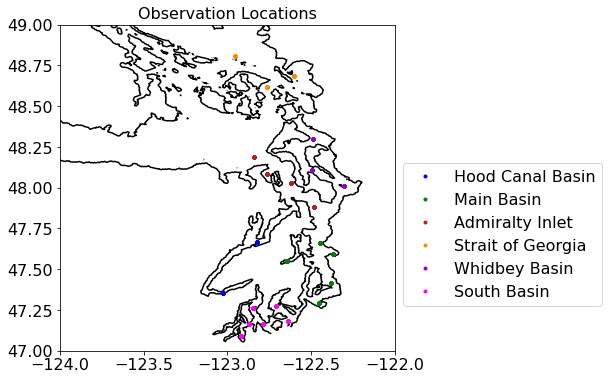

In [8]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('blue','green','firebrick','darkorange','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue')
datreg=dict()
for ind, iregion in enumerate(data.Basin.unique()):
    datreg[iregion] = data.loc[data.Basin==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 49)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-124, -122);
ax.set_title('Observation Locations');

In [9]:
#creating new dictionaries that make it easy to call on specific years.
datstat=dict()
for ind, istation in enumerate(data.Station.unique()):
    datstat[istation]=data.loc[data.Station == istation]
    
datreg=dict()
for iregion in data.Basin.unique():
    datreg[iregion] = data.loc[data.Basin==iregion] 
    
datyear=dict()
for ind, iyear in enumerate(data.dtUTC.dt.year.unique()):
    datyear[iyear] = data.loc[data.dtUTC.dt.year==iyear]

# Nitrate
## Observed nitrate and model nitrate over time with depth

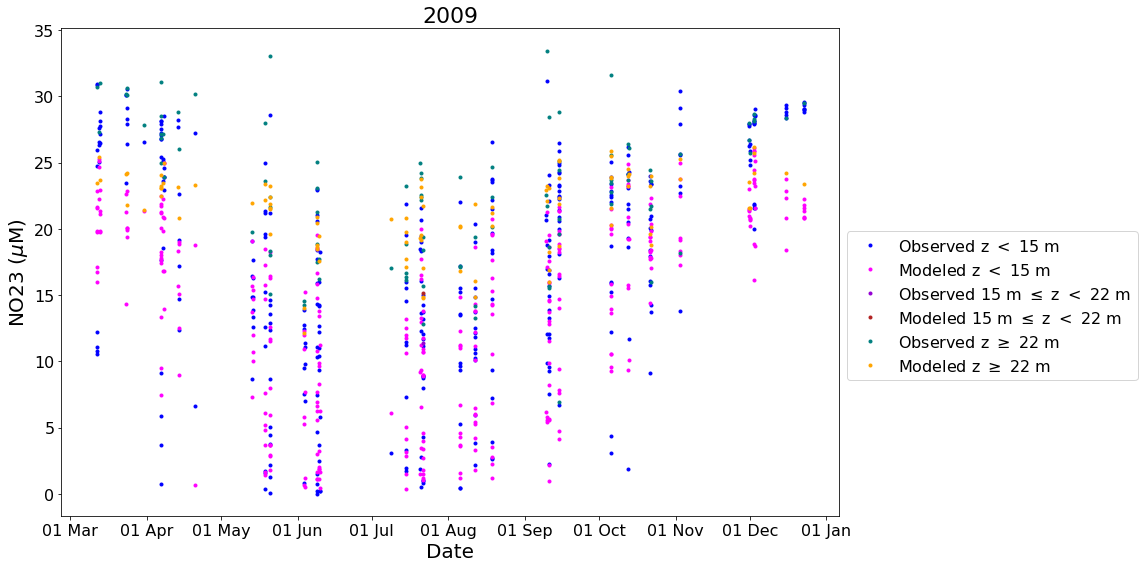

In [16]:
obsvar='NO23'
modvar='mod_nitrate'

ket.multi_timese_graph(data,year,obsvar,modvar,(16,8))

In [21]:
data.Basin.unique()

array(['Hood Canal Basin', 'Main Basin', 'Admiralty Inlet',
       'Strait of Georgia', 'Whidbey Basin', 'South Basin'], dtype=object)

## Observed nitrate and model nitrate over time for different regions

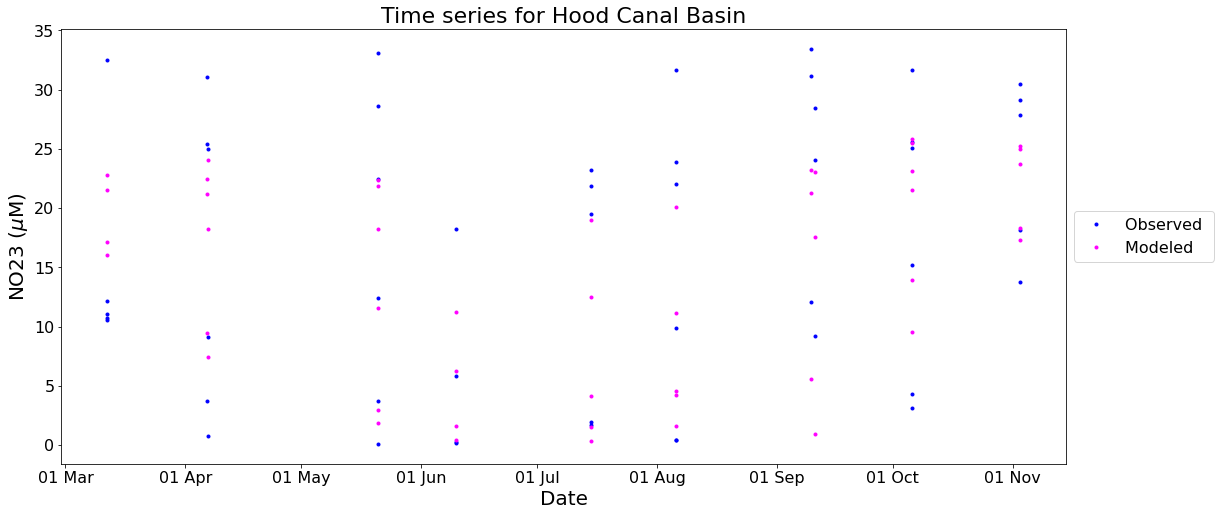

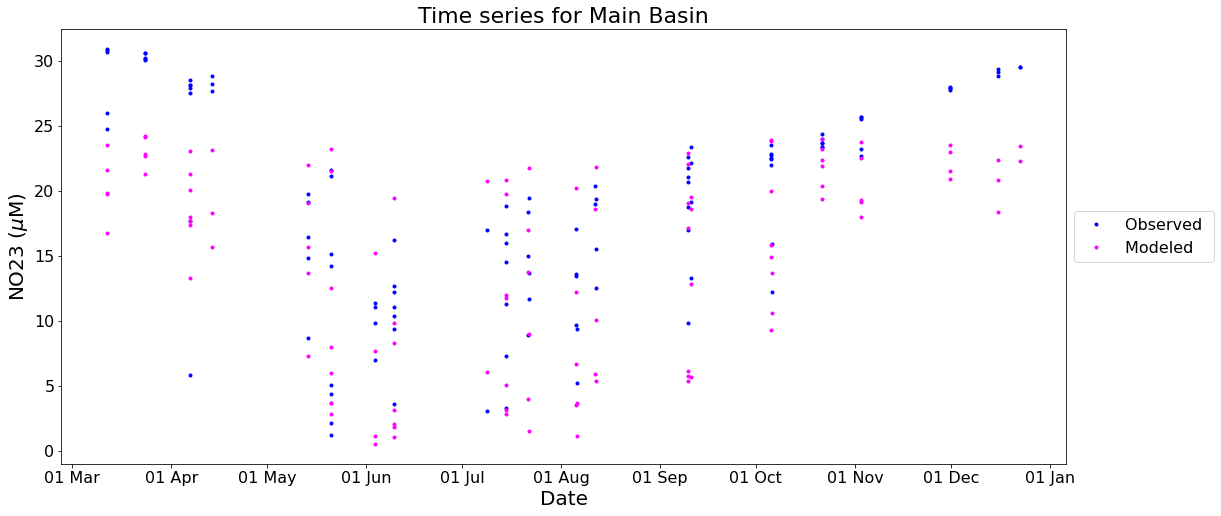

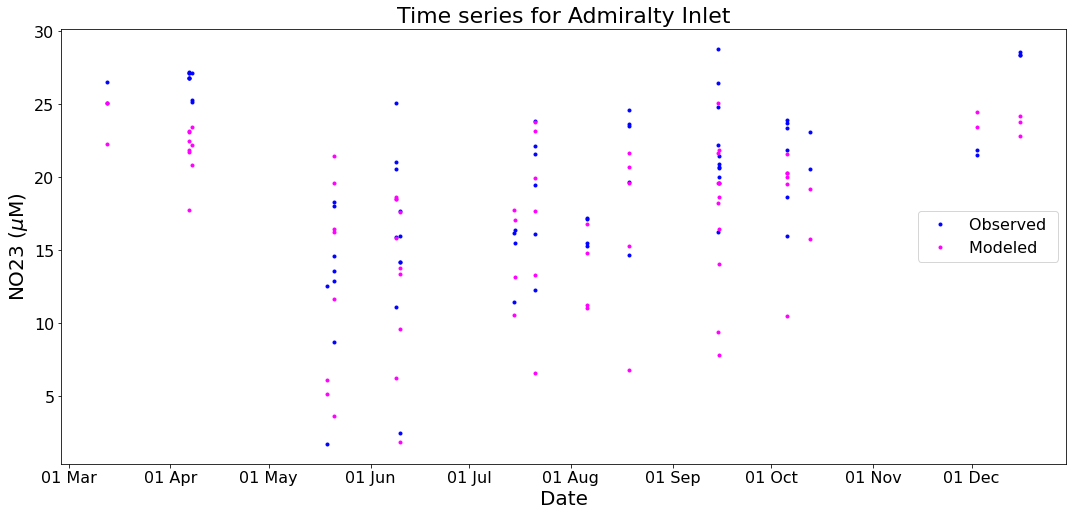

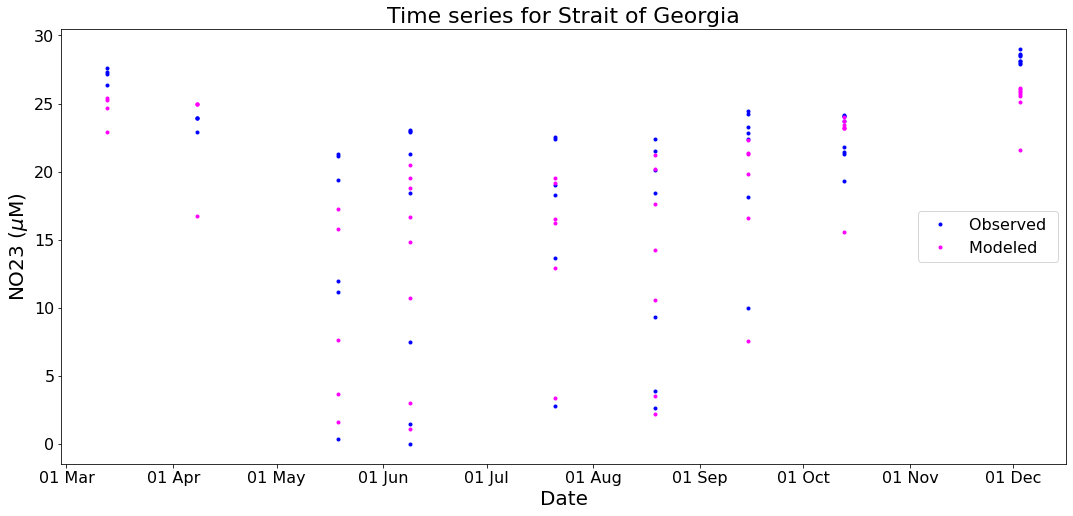

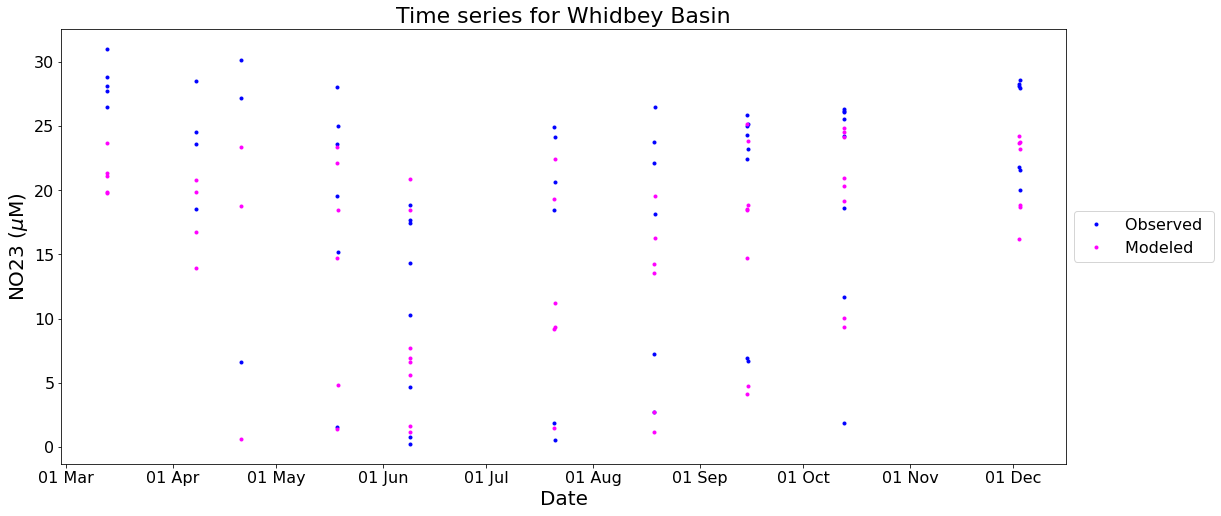

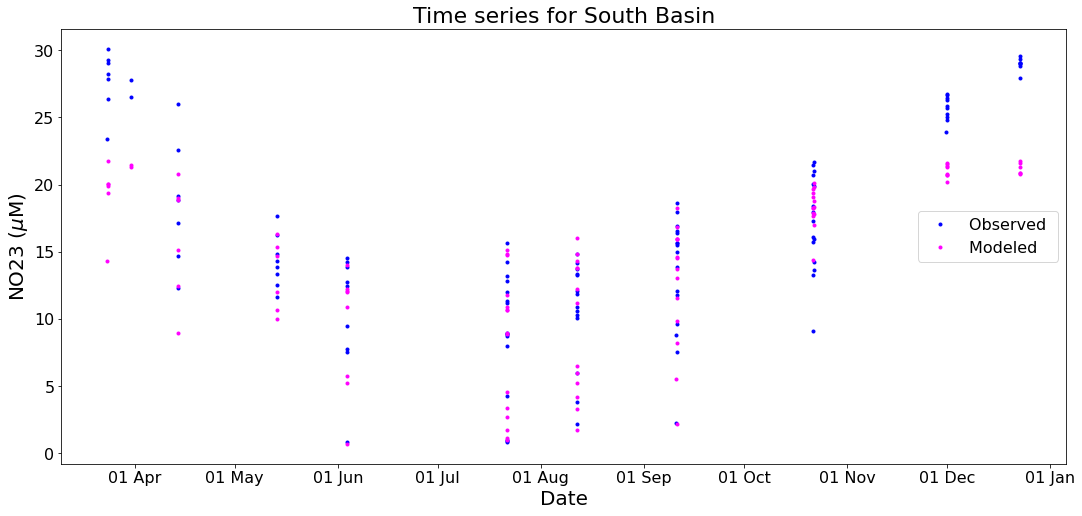

In [33]:
TsByRegion(data.Basin.unique(),obsvar,modvar,year)

## Model Error over time

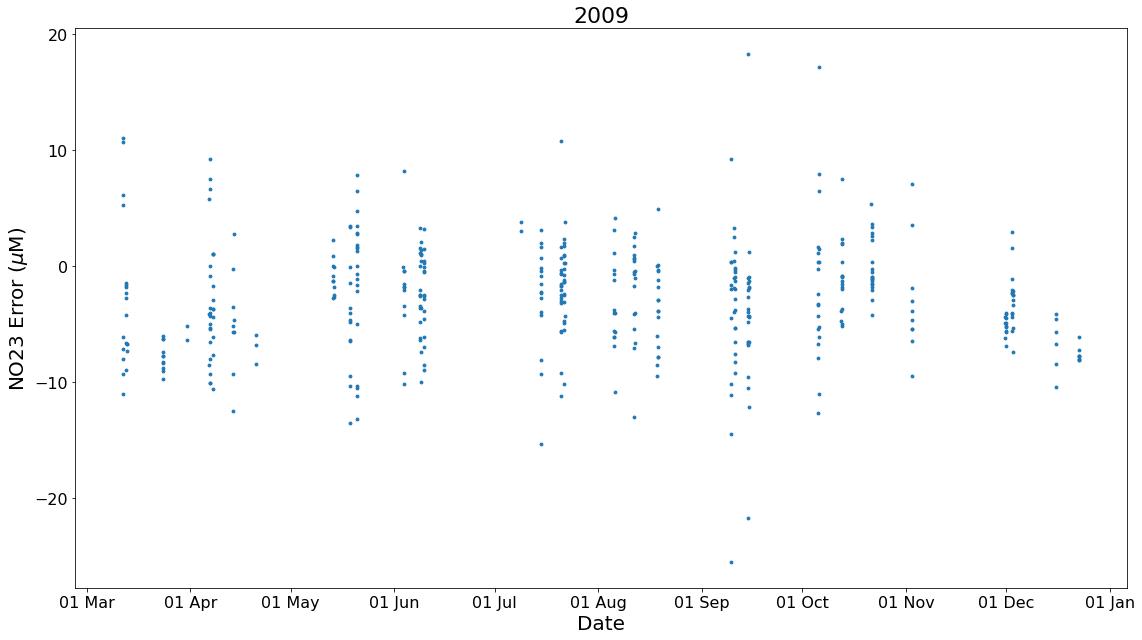

In [13]:
obsvar='NO23'
modvar='mod_nitrate'

ket.multi_timerror_graph(data,datyear,year,obsvar,modvar,(16,9))

# Silicon
## Observed Silicon and model Silicon over time with depth

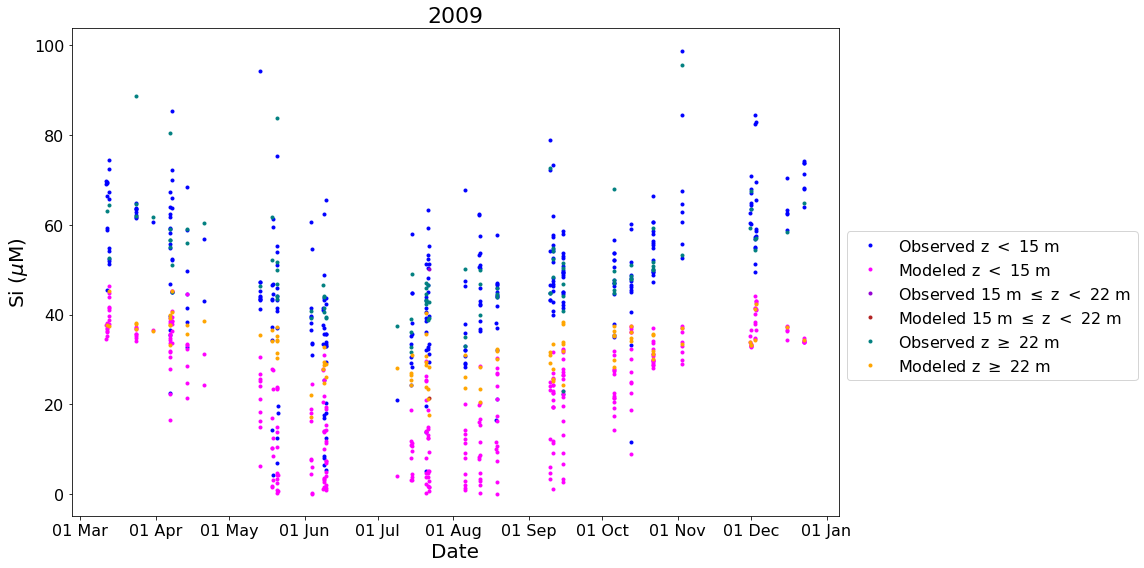

In [34]:
obsvar='Si'
modvar='mod_silicon'

ket.multi_timese_graph(data,year,obsvar,modvar,(16,8))

## Observed silicon and model silicon over time for different regions

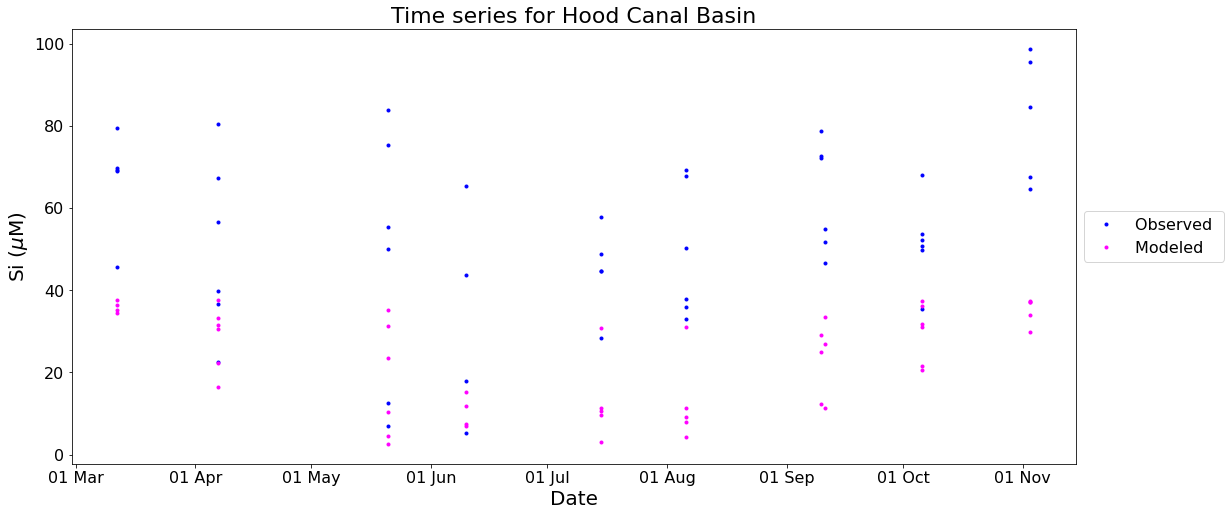

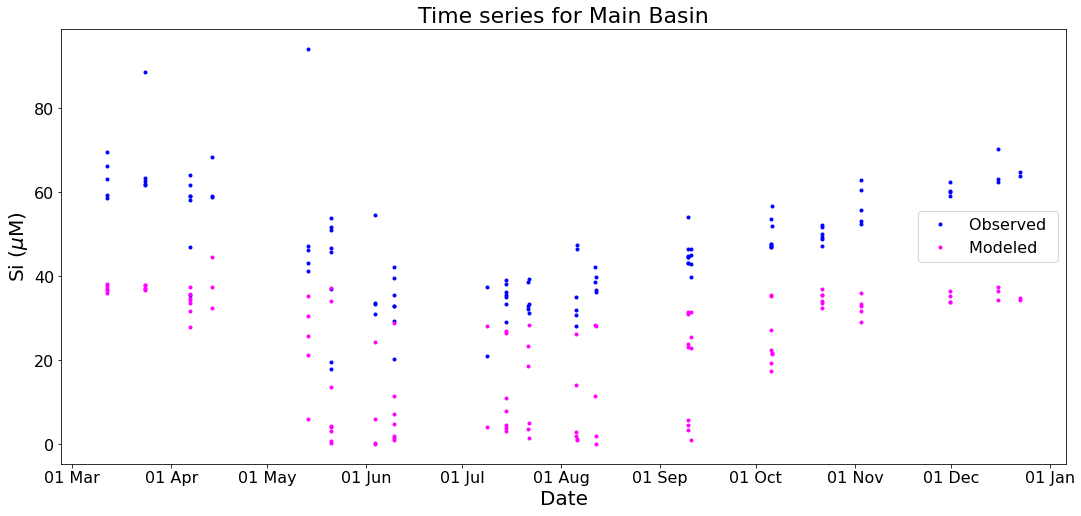

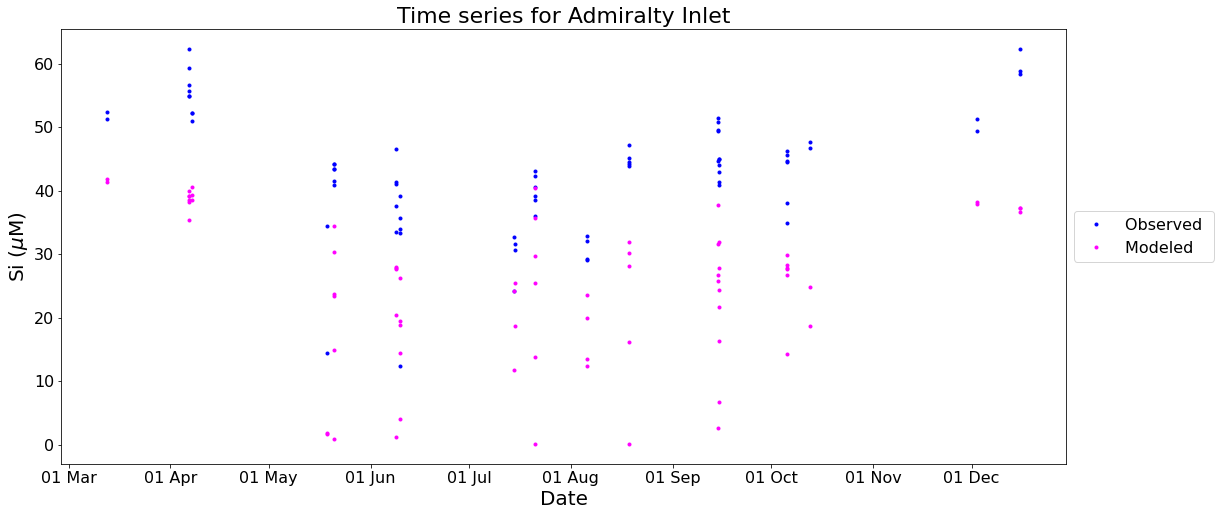

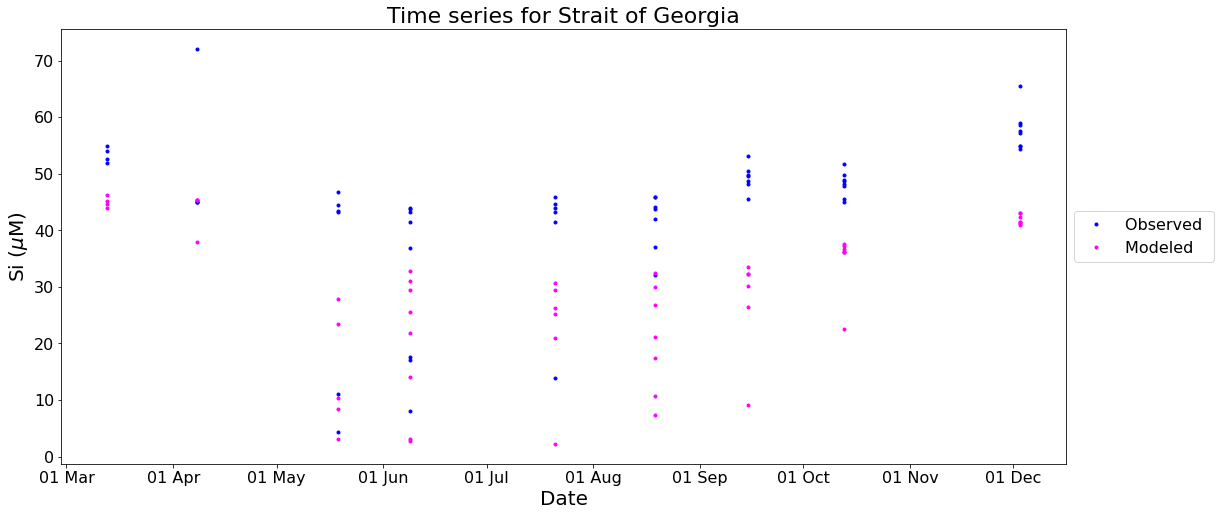

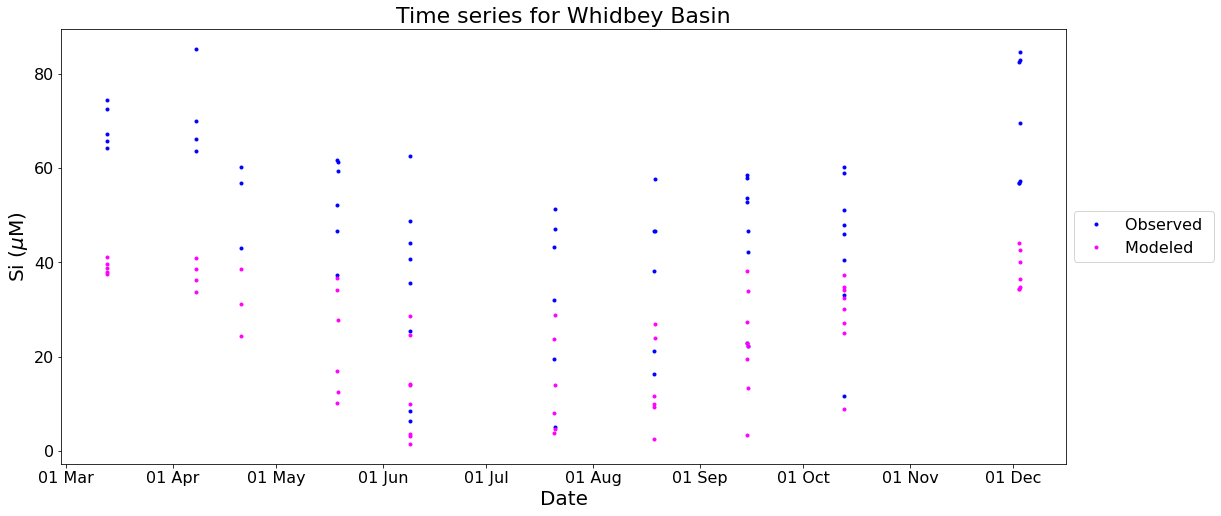

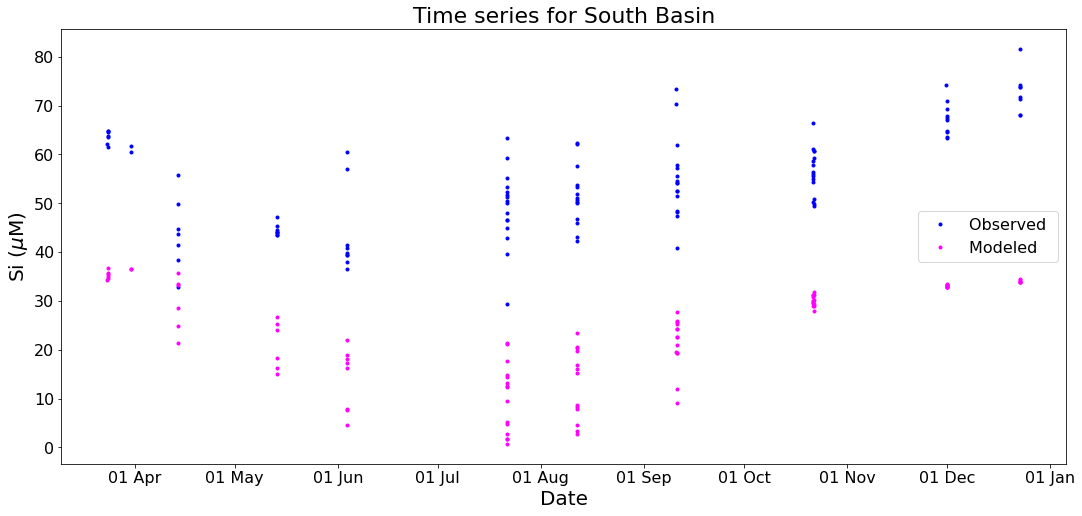

In [35]:
TsByRegion(data.Basin.unique(),obsvar,modvar,year)

## Model Error over time

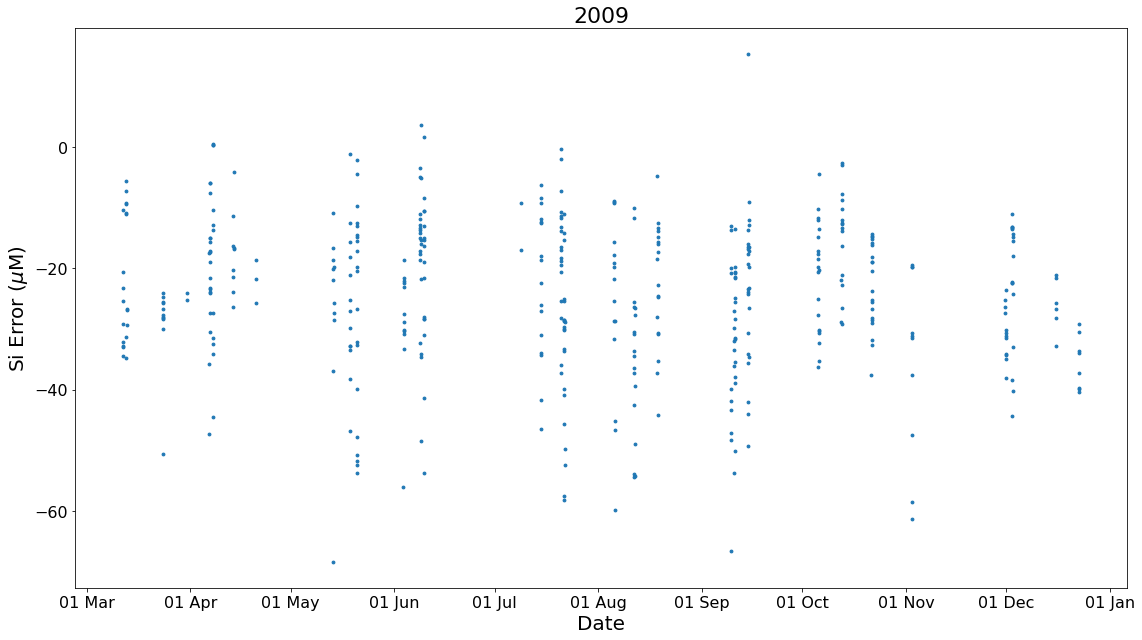

In [14]:
obsvar='Si'
modvar='mod_silicon'

ket.multi_timerror_graph(data,datyear,year,obsvar,modvar,(16,9))

# Ammonia

## Observed Ammonia and model Ammonia over time by depth

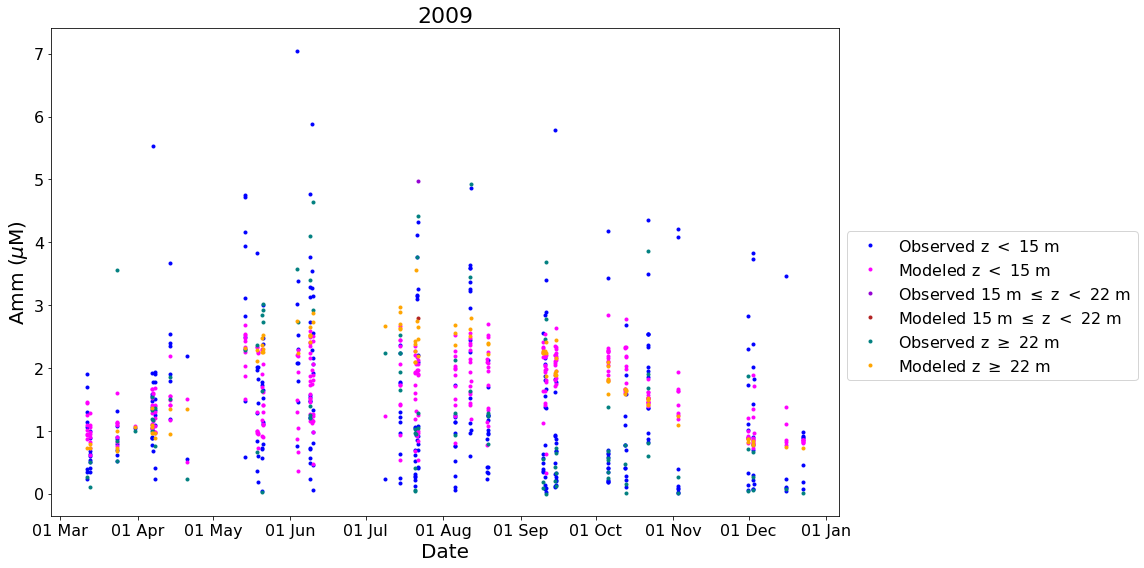

In [37]:
obsvar='Amm'
modvar='mod_ammonium'

ket.multi_timese_graph(data,year,obsvar,modvar,(16,8))

## Observed Ammonia and model Ammonia over time for different regions

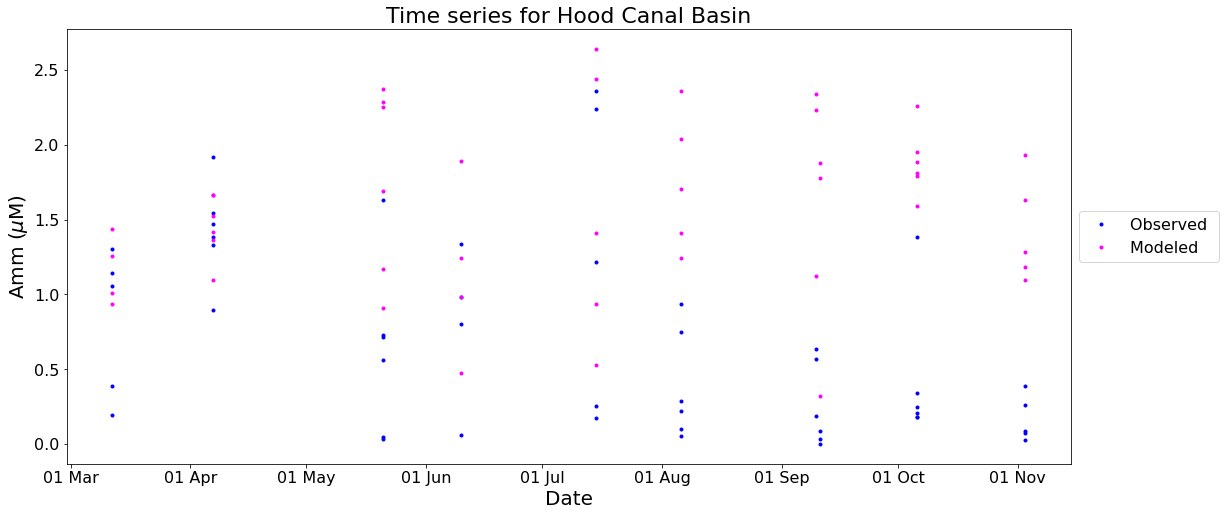

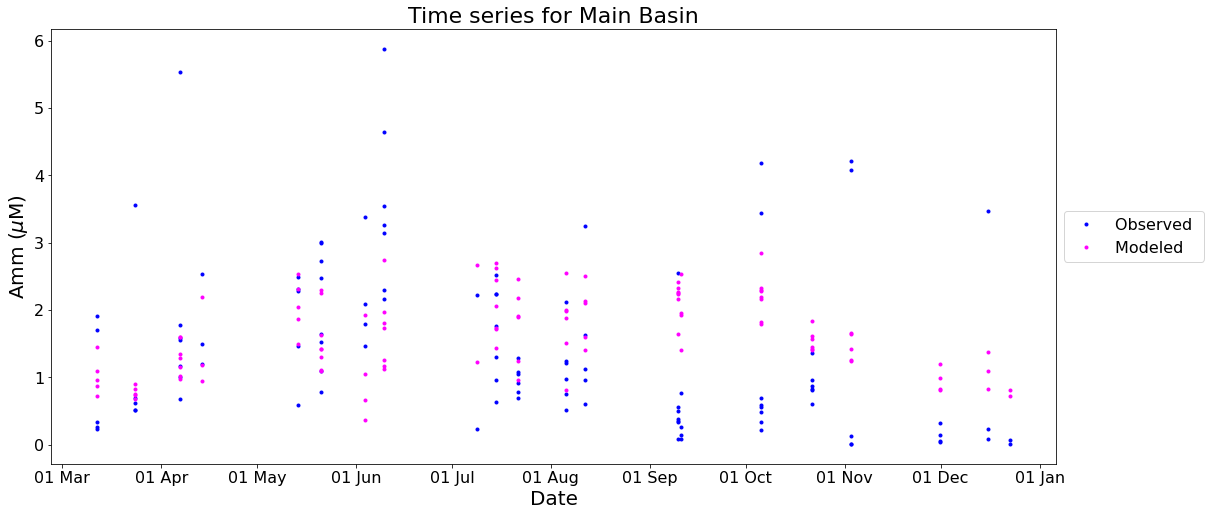

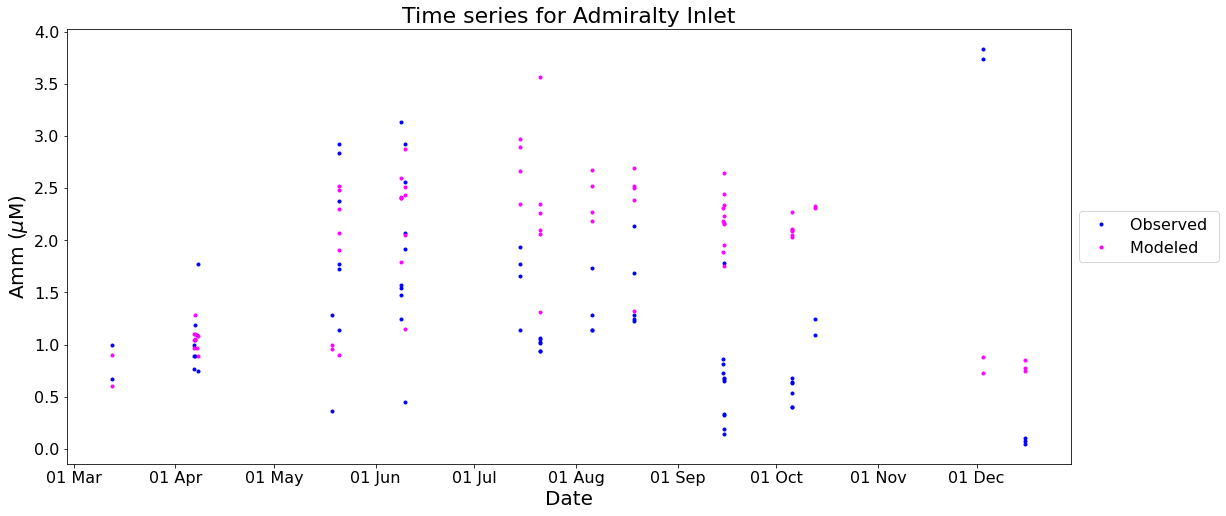

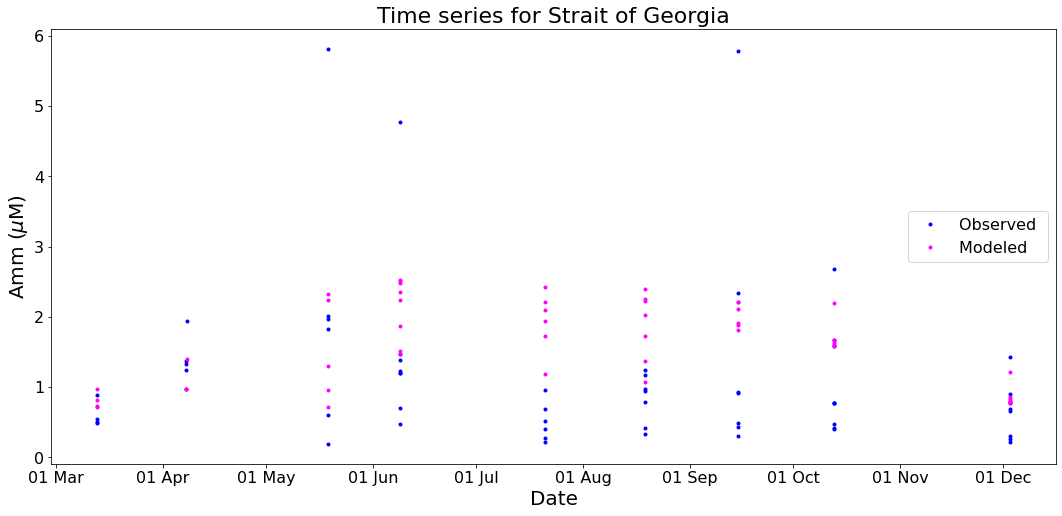

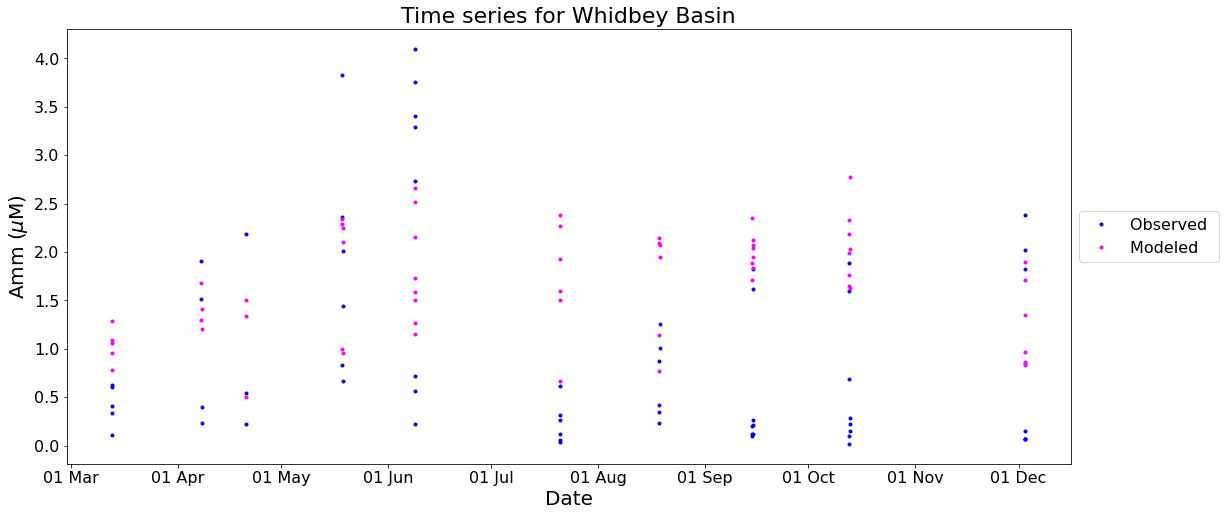

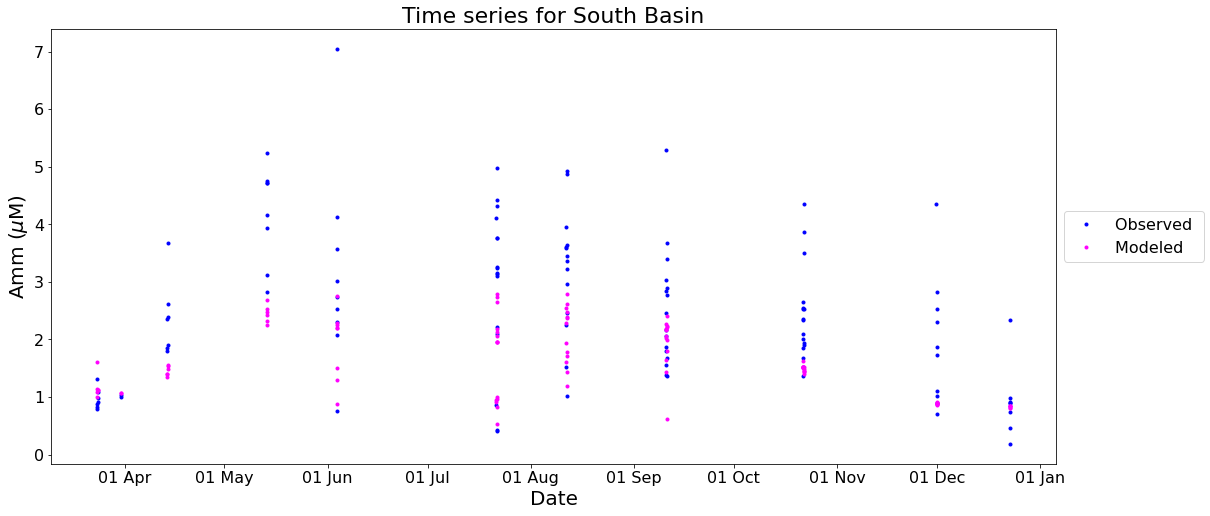

In [38]:
TsByRegion(data.Basin.unique(),obsvar,modvar,year)

# Error vs time of year

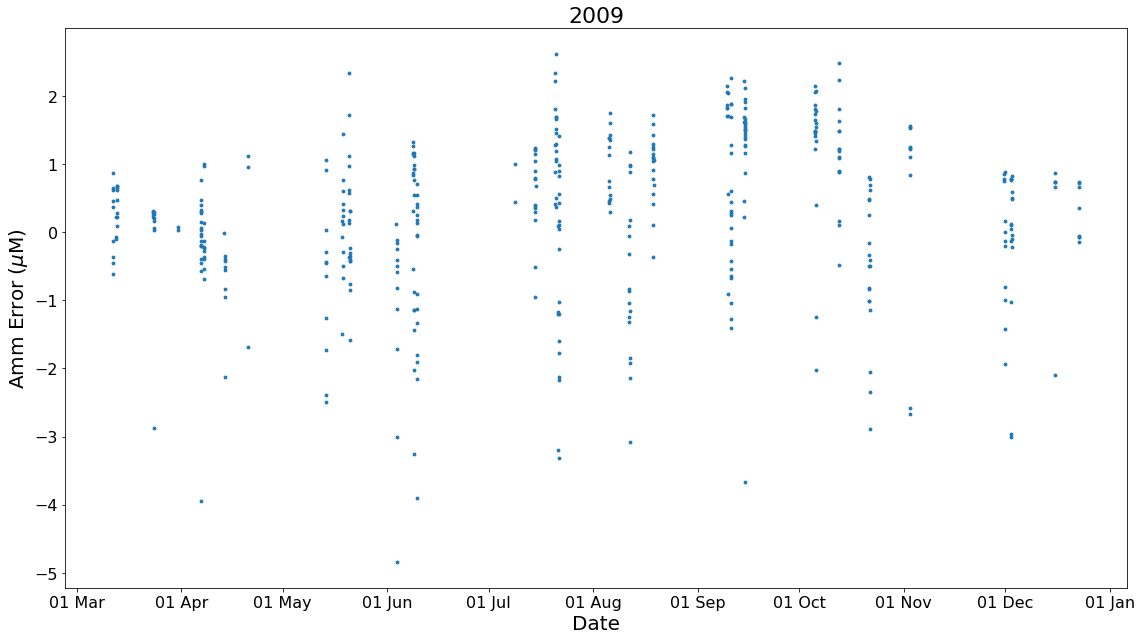

In [15]:
obsvar='Amm'
modvar='mod_ammonium'

ket.multi_timerror_graph(data,datyear,year,obsvar,modvar,(16,9))

# Error vs time of year

## Nitrate

## Silicon

## Ammonium